# HW2 Jiahao Sun 7438675766

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as sm
import statsmodels.api as sm2
from statsmodels.stats.outliers_influence import OLSInfluence as influence
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## b(i)

In [2]:
df = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx",sheet_name = "Sheet1",header=0)

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### There are 9568 rows and 5 columns. Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V). Label is net hourly electrical energy output (PE) of the plant. Each row is a sample.

## b(ii)

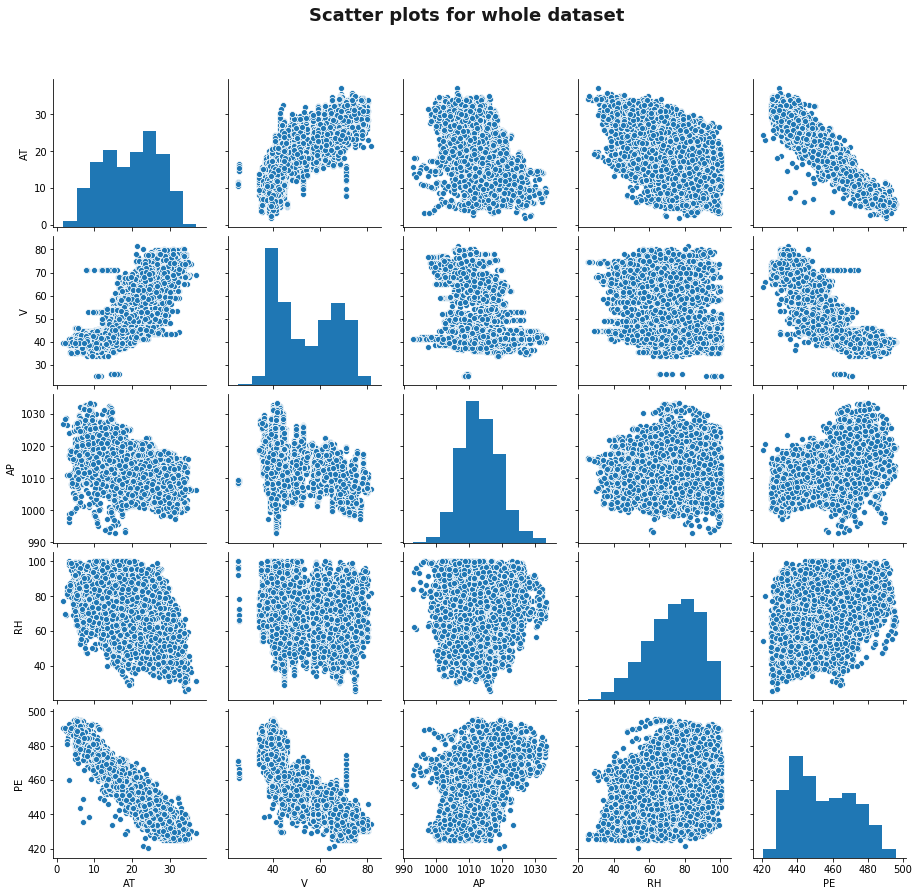

In [4]:
pairplot_fig_1 = sns.pairplot(df,vars=['AT','V','AP','RH','PE'],kind= 'scatter',diag_kind = 'hist')
plt.subplots_adjust(top=0.9)
pairplot_fig_1.fig.suptitle("Scatter plots for whole dataset", fontsize=18, alpha=0.9, weight='bold')
plt.show()

### According to the scatter plot, AT & V have negative relationship with label PE.  Meanwhile, AT has positive relationship with V

## b(iii)

In [5]:
v = ['AT','V','AP','RH','PE']
res = []
for item in v:
    ans = []
    ans.append(df[item].mean())
    ans.append(df[item].median())
    ans.append(df[item].max()-df[item].min())
    ans.append(df[item].quantile(0.25))
    ans.append(df[item].quantile(0.75))
    ans.append(df[item].quantile(0.75)-df[item].quantile(0.25))
    res.append(ans)


In [6]:
res_df = pd.DataFrame(res,columns=['mean','median','range','first quantile','third quantile','interquartile range'],index =v)

In [7]:
res_df

,mean,median,range,first quantile,third quantile,interquartile range
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


## c(i)

### PE~AT

In [8]:
AT = df['AT'].values.reshape(-1,1)
V = df['V'].values.reshape(-1,1)
AP = df['AP'].values.reshape(-1,1)
RH = df['RH'].values.reshape(-1,1)
PE = df['PE'].values

In [9]:
reg_at = linear_model.LinearRegression()
reg_at.fit(AT,PE)
PE_pred = reg_at.predict(AT)

In [10]:
(reg_at.coef_[0],reg_at.intercept_,reg_at.score(AT,PE))

(-2.171319958517794, 497.03411989276674, 0.8989475964148236)

In [11]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(PE, PE_pred))

Mean squared error: 29.43


In [12]:
at_model= sm.ols('PE~AT', df).fit()
print(at_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:52:56   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

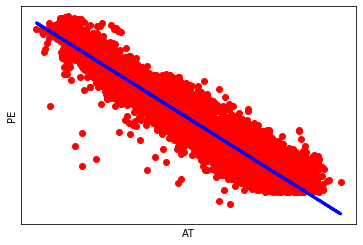

In [13]:
plt.scatter(AT, PE,  color='red')
plt.plot(AT, PE_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('AT')
plt.ylabel("PE")

plt.show()

In [14]:
inf = influence(at_model)

In [15]:
cooks = inf.cooks_distance
cooks_distance = cooks[0]
p_value = cooks[1]
print(cooks_distance)
print(p_value)

0       4.133478e-06
1       1.112001e-05
2       5.870104e-05
3       5.042545e-05
4       5.520942e-07
            ...     
9563    1.496728e-06
9564    4.672671e-06
9565    1.798870e-06
9566    1.670674e-04
9567    1.877990e-05
Length: 9568, dtype: float64
[0.99999587 0.99998888 0.9999413  ... 0.9999982  0.99983295 0.99998122]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, "Cook's Distance Outlier Detection")

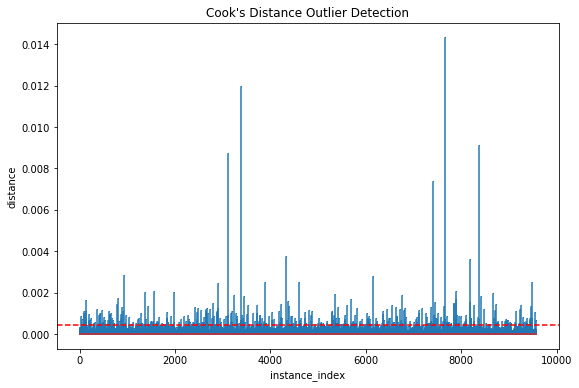

In [16]:
plt.figure(figsize=(9,6))
plt.stem(cooks[0], markerfmt=",")
plt.xlabel("instance_index")
plt.ylabel("distance")
plt.axhline(y= 4/len(cooks_distance),ls="--",c="red")
plt.title("Cook's Distance Outlier Detection")

In [17]:
outlier=[]
for i in range(0,9568):
    if cooks_distance[i]>= 4/len(cooks_distance):
        outlier.append([i,cooks_distance[i]])
print(len(outlier))

416


In [18]:
outlier

[[21, 0.0008188331371738609],
 [61, 0.0006786127390944946],
 [87, 0.001042944170789045],
 [89, 0.0009617878120032228],
 [121, 0.0006349209286616942],
 [126, 0.0005512628908867899],
 [140, 0.0016195583218018414],
 [142, 0.001068677574302297],
 [199, 0.0008981436274933697],
 [202, 0.0006498772887428321],
 [210, 0.0005044607924842079],
 [222, 0.0006212625059968537],
 [241, 0.0007431882430838361],
 [297, 0.00047824710557271935],
 [310, 0.0004802098875634414],
 [317, 0.000545396682995522],
 [374, 0.0011612303213242707],
 [410, 0.0004741401432825576],
 [417, 0.0004329061393568267],
 [418, 0.0008553528367900183],
 [431, 0.0009885658145991135],
 [434, 0.0004568441273258998],
 [437, 0.0009043284690822326],
 [461, 0.00046361264515316176],
 [464, 0.0011096394815422472],
 [483, 0.0005503303734092005],
 [497, 0.00046489547753404285],
 [511, 0.0007673418718426267],
 [523, 0.00043854167516080083],
 [542, 0.0006106069526635562],
 [567, 0.00046182752382841456],
 [606, 0.0006252503864640213],
 [611, 0.0

### PE~V

In [19]:
reg_v = linear_model.LinearRegression()
reg_v.fit(V,PE)
PE_pred = reg_v.predict(V)

In [20]:
(reg_v.coef_[0],reg_v.intercept_,reg_v.score(V,PE))

(-1.168135126555713, 517.801526308386, 0.7565177870683979)

In [21]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(PE, PE_pred))

Mean squared error: 70.91


In [22]:
v_model= sm.ols('PE~V', df).fit()
print(v_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:54:07   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

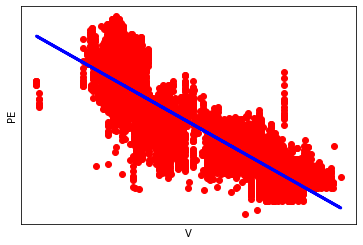

In [23]:
plt.scatter(V, PE,  color='red')
plt.plot(V, PE_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('V')
plt.ylabel("PE")

plt.show()

In [24]:
inf = influence(v_model)
cooks = inf.cooks_distance
cooks_distance = cooks[0]
p_value = cooks[1]
print(cooks_distance)
print(p_value)

0       4.829366e-05
1       1.408450e-08
2       4.933077e-04
3       1.482397e-05
4       1.885601e-08
            ...     
9563    6.221848e-08
9564    1.038173e-05
9565    5.062615e-06
9566    1.558170e-06
9567    7.567830e-05
Length: 9568, dtype: float64
[0.99995171 0.99999999 0.99950681 ... 0.99999494 0.99999844 0.99992432]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, "Cook's Distance Outlier Detection")

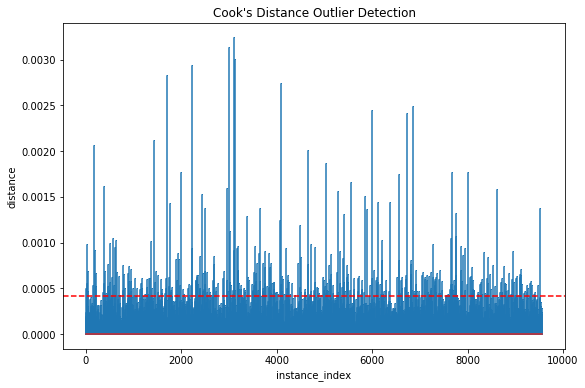

In [25]:
plt.figure(figsize=(9,6))
plt.stem(cooks[0], markerfmt=",")
plt.xlabel("instance_index")
plt.ylabel("distance")
plt.axhline(y= 4/len(cooks_distance),ls="--",c="red")
plt.title("Cook's Distance Outlier Detection")

In [26]:
outlier=[]
for i in range(0,9568):
    if cooks_distance[i]>= 4/len(cooks_distance):
        outlier.append([i,cooks_distance[i]])
print(len(outlier))

423


In [27]:
outlier

[[2, 0.0004933076956078685],
 [21, 0.0009771276136561879],
 [24, 0.0005521291272287202],
 [47, 0.0004614194581300158],
 [57, 0.0006786350753257702],
 [154, 0.0005227840600651294],
 [182, 0.0020614766737198473],
 [199, 0.0009098165917029087],
 [210, 0.0006560111944762483],
 [213, 0.0005163334880554243],
 [352, 0.00045356388125981093],
 [379, 0.001604667158709839],
 [388, 0.0005469212586060188],
 [410, 0.0006820963936740241],
 [421, 0.00043976423997794343],
 [459, 0.0004278722855655166],
 [468, 0.0007505690406499747],
 [473, 0.0005191409725636796],
 [497, 0.00047443077085553676],
 [502, 0.0005544236927247444],
 [511, 0.0009860139802768386],
 [555, 0.0006095202209613599],
 [570, 0.0010363702618412663],
 [597, 0.000521829941774629],
 [606, 0.0009380315768795702],
 [638, 0.0010194902736007018],
 [662, 0.0006704658234269979],
 [690, 0.0006291024992893663],
 [775, 0.0004715235275513429],
 [786, 0.0007481128554894891],
 [806, 0.0006420436218258916],
 [830, 0.0004916399313507815],
 [887, 0.0006

### PE~AP

In [28]:
reg_ap = linear_model.LinearRegression()
reg_ap.fit(AP,PE)
PE_pred = reg_ap.predict(AP)

In [29]:
(reg_ap.coef_[0],reg_ap.intercept_,reg_ap.score(AP,PE))

(1.489871673399114, -1055.2609889844396, 0.2687686564110674)

In [30]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(PE, PE_pred))

Mean squared error: 212.97


In [31]:
ap_model= sm.ols('PE~AP', df).fit()
print(ap_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:55:18   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

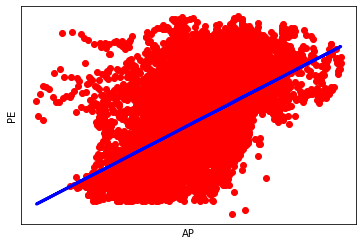

In [32]:
plt.scatter(AP, PE,  color='red')
plt.plot(AP, PE_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('AP')
plt.ylabel("PE")

plt.show()

In [33]:
inf = influence(ap_model)
cooks = inf.cooks_distance
cooks_distance = cooks[0]
p_value = cooks[1]
print(cooks_distance)
print(p_value)

0       5.509639e-05
1       2.283975e-04
2       3.258436e-04
3       3.542519e-06
4       2.337129e-04
            ...     
9563    5.152473e-06
9564    6.551920e-08
9565    1.452406e-04
9566    9.445477e-05
9567    1.740664e-05
Length: 9568, dtype: float64
[0.99994491 0.99977163 0.99967421 ... 0.99985477 0.99990555 0.99998259]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, "Cook's Distance Outlier Detection")

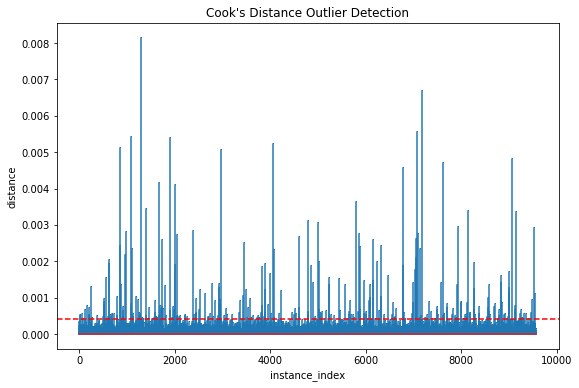

In [34]:
plt.figure(figsize=(9,6))
plt.stem(cooks[0], markerfmt=",")
plt.xlabel("instance_index")
plt.ylabel("distance")
plt.axhline(y= 4/len(cooks_distance),ls="--",c="red")
plt.title("Cook's Distance Outlier Detection")

In [35]:
outlier=[]
for i in range(0,9568):
    if cooks_distance[i]>= 4/len(cooks_distance):
        outlier.append([i,cooks_distance[i]])
print(len(outlier))

300


In [36]:
outlier

[[21, 0.0005020636901708645],
 [22, 0.0005350244315974142],
 [57, 0.0005417350652699648],
 [74, 0.0004251626068899199],
 [114, 0.0006564400934612085],
 [154, 0.0007716905849008525],
 [191, 0.0007259610875529761],
 [198, 0.0005056778861324281],
 [199, 0.0005113741168170301],
 [252, 0.0012895091231230186],
 [260, 0.0004426800881224488],
 [371, 0.0004939010068157007],
 [488, 0.00045702977398147246],
 [511, 0.0004546135336515099],
 [513, 0.0007930015503611772],
 [518, 0.0008779947922457327],
 [521, 0.0009622950240188219],
 [557, 0.0015359256154302042],
 [606, 0.00047126674598840844],
 [610, 0.00044390056862498624],
 [614, 0.0019205010058246635],
 [618, 0.0020325173107953436],
 [638, 0.000537311350855744],
 [660, 0.00046845711367435794],
 [688, 0.000520016801468061],
 [690, 0.000548004417466131],
 [724, 0.0005436742834920075],
 [786, 0.0004899447352205247],
 [795, 0.0010239416385193633],
 [847, 0.005127692607783292],
 [857, 0.0024308777055372876],
 [882, 0.0013458689587028116],
 [887, 0.000

### PE~RH

In [37]:
reg_rh = linear_model.LinearRegression()
reg_rh.fit(RH,PE)
PE_pred = reg_rh.predict(RH)

In [38]:
(reg_rh.coef_[0],reg_rh.intercept_,reg_rh.score(RH,PE))

(0.4556501022629802, 420.96176615548393, 0.15193944023117567)

In [39]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(PE, PE_pred))

Mean squared error: 247.00


In [40]:
rh_model= sm.ols('PE~RH', df).fit()
print(rh_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:56:45   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

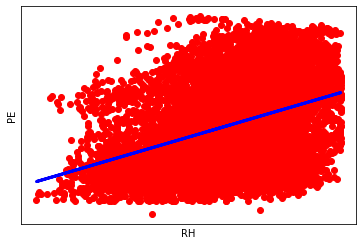

In [41]:
plt.scatter(RH, PE,  color='red')
plt.plot(RH, PE_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('RH')
plt.ylabel("PE")

plt.show()

In [42]:
inf = influence(rh_model)
cooks = inf.cooks_distance
cooks_distance = cooks[0]
p_value = cooks[1]
print(cooks_distance)
print(p_value)

0       1.698030e-05
1       5.088060e-06
2       3.698824e-04
3       1.967935e-05
4       5.969319e-05
            ...     
9563    2.998747e-06
9564    8.437611e-05
9565    1.001861e-04
9566    6.147522e-05
9567    4.677079e-07
Length: 9568, dtype: float64
[0.99998302 0.99999491 0.99963019 ... 0.99989982 0.99993853 0.99999953]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, "Cook's Distance Outlier Detection")

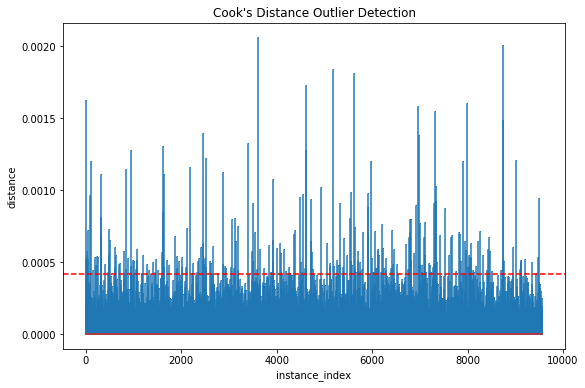

In [43]:
plt.figure(figsize=(9,6))
plt.stem(cooks[0], markerfmt=",")
plt.xlabel("instance_index")
plt.ylabel("distance")
plt.axhline(y= 4/len(cooks_distance),ls="--",c="red")
plt.title("Cook's Distance Outlier Detection")

In [44]:
outlier=[]
for i in range(0,9568):
    if cooks_distance[i]>= 4/len(cooks_distance):
        outlier.append([i,cooks_distance[i]])
print(len(outlier))

249


In [45]:
outlier

[[8, 0.0016177847200177986],
 [15, 0.0005223073162565509],
 [16, 0.0004770918848239434],
 [21, 0.0005690585225799694],
 [48, 0.0007152576853565961],
 [57, 0.0005117808688411569],
 [82, 0.0009606123077405818],
 [115, 0.0011932055280676874],
 [154, 0.000434897185621431],
 [199, 0.000527522674033801],
 [210, 0.00047229235793994084],
 [225, 0.0005383326970622502],
 [252, 0.0005275695684429419],
 [310, 0.0006837071703710313],
 [315, 0.0008077237597970079],
 [317, 0.0011069314879733141],
 [410, 0.0004796282842751688],
 [464, 0.0004251147124764359],
 [480, 0.0005394516767426086],
 [490, 0.000723856231943184],
 [511, 0.0006446783033892542],
 [606, 0.000457560755540427],
 [611, 0.0005975113007608432],
 [638, 0.0005448269790014635],
 [690, 0.000482699693993098],
 [707, 0.0004900304573163778],
 [793, 0.0005725807596101182],
 [844, 0.0004484506576572712],
 [849, 0.0011422581018635846],
 [882, 0.0005245640417061235],
 [953, 0.001269041278408914],
 [955, 0.00046467468666529563],
 [957, 0.00042763636

### According to the t-statistic and p-value in 4 summary report, all of the models have statistically significant association between the predictor and the response. I identified the outliers, counted the numbers and printed them out (index, value) by using Cook's Distance and setting the threshold as 4/n.

## d

In [46]:
reg_whole = linear_model.LinearRegression()
X = df[['AT','V','AP','RH']].values
reg_whole.fit(X,PE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
reg_whole.coef_

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

In [48]:
whole_model= sm.ols('PE~AT+V+AP+RH', df).fit()
print(whole_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:57:58   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

### All the predictors are significant. The R-squared is 0.929. Prob(F-statistic) also tell the joint statistically significance. Therefore, all the predictors can reject the null hypothesis.

## e

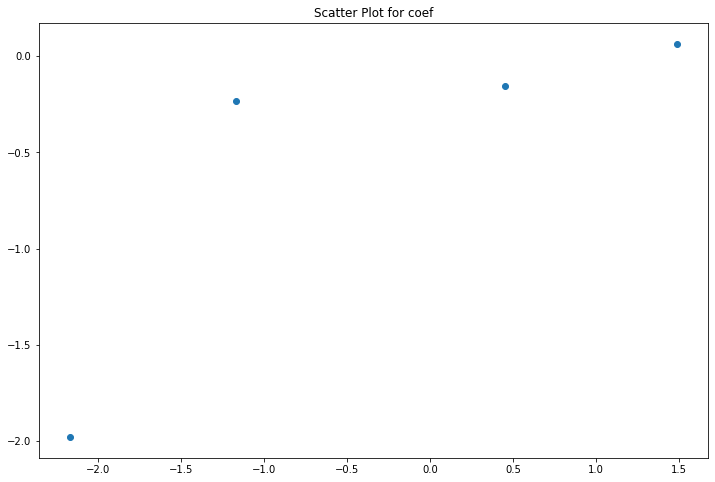

In [49]:
x =[reg_at.coef_[0],reg_v.coef_[0],reg_ap.coef_[0],reg_rh.coef_[0]]
y = reg_whole.coef_.tolist()
plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.title('Scatter Plot for coef')
plt.show()

## f

In [50]:
AT = df['AT'].values.reshape(-1,1)
V = df['V'].values.reshape(-1,1)
AP = df['AP'].values.reshape(-1,1)
RH = df['RH'].values.reshape(-1,1)
PE = df['PE'].values

In [51]:
poly = PolynomialFeatures(degree=3,include_bias = False)
AT_re = poly.fit_transform(AT)
V_re = poly.fit_transform(V)
AP_re = poly.fit_transform(AP)
RH_re = poly.fit_transform(RH)

In [52]:
AT_df = pd.DataFrame(AT_re,columns=['AT','AT^2','AT^3'])
V_df = pd.DataFrame(V_re,columns=['V','V^2','V^3'])
AP_df = pd.DataFrame(AP_re,columns=['AP','AP^2','AP^3'])
RH_df = pd.DataFrame(RH_re,columns=['RH','RH^2','RH^3'])

In [53]:
df_whole = pd.concat([AT_df,V_df,AP_df,RH_df,df['PE']], axis=1)
df_whole

,AT,AT^2,AT^3,V,V^2,V^3,AP,AP^2,AP^3,RH,RH^2,RH^3,PE
0,14.96,223.8016,3348.071936,41.76,1743.8976,72825.163776,1024.07,1.048719e+06,1.073962e+09,73.17,5353.8489,391741.124013,463.26
1,25.18,634.0324,15964.935832,62.96,3963.9616,249571.022336,1020.04,1.040482e+06,1.061333e+09,59.08,3490.4464,206215.573312,444.37
2,5.11,26.1121,133.432831,39.40,1552.3600,61162.984000,1012.16,1.024468e+06,1.036925e+09,92.14,8489.7796,782248.292344,488.56
3,20.86,435.1396,9077.012056,57.32,3285.5824,188329.583168,1010.24,1.020585e+06,1.031036e+09,76.64,5873.6896,450159.570944,446.48
4,10.82,117.0724,1266.723368,37.50,1406.2500,52734.375000,1009.23,1.018545e+06,1.027946e+09,96.62,9335.4244,901988.705528,473.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,277.2225,4615.754625,49.69,2469.0961,122689.385209,1014.01,1.028216e+06,1.042622e+09,91.00,8281.0000,753571.000000,460.03
9564,13.19,173.9761,2294.744759,39.18,1535.0724,60144.136632,1023.67,1.047900e+06,1.072704e+09,66.78,4459.5684,297809.977752,469.62
9565,31.32,980.9424,30723.115968,74.33,5524.9489,410669.451737,1012.92,1.026007e+06,1.039263e+09,36.48,1330.7904,48547.233792,429.57
9566,24.48,599.2704,14670.139392,69.45,4823.3025,334978.358625,1013.86,1.027912e+06,1.042159e+09,62.39,3892.5121,242853.829919,435.74


In [54]:
X = df_whole[['AT','AT^2','AT^3']]
Y = df_whole['PE']
X = sm2.add_constant(X)
at_model2= sm2.OLS(Y,X).fit()
print(at_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:58:32   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [55]:
X = df_whole[['V','V^2','V^3']]
Y = df_whole['PE']
X = sm2.add_constant(X)
v_model2= sm2.OLS(Y,X).fit()
print(v_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:58:36   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

In [56]:
X = df_whole[['AP','AP^2','AP^3']]
Y = df_whole['PE']
X = sm2.add_constant(X)
ap_model2= sm2.OLS(Y,X).fit()
print(ap_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:58:40   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

In [57]:
X = df_whole[['RH','RH^2','RH^3']]
Y = df_whole['PE']
X = sm2.add_constant(X)
rh_model2= sm2.OLS(Y,X).fit()
print(rh_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:58:43   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

### As we can see from 4 reports, only V^2 is not significant.

## g

In [58]:
poly2 = PolynomialFeatures(degree=2,interaction_only = True,include_bias = False)
df_nd = df[['AT','V','AP','RH']].values
df_re = poly2.fit_transform(df_nd)

In [59]:
df_inter = pd.DataFrame(df_re,columns =['AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH'])

In [60]:
df_inter_whole = pd.concat([df_inter,df['PE']], axis=1)
df_inter_whole

,AT,V,AP,RH,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH,PE
0,14.96,41.76,1024.07,73.17,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,463.26
1,25.18,62.96,1020.04,59.08,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,444.37
2,5.11,39.40,1012.16,92.14,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,488.56
3,20.86,57.32,1010.24,76.64,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,446.48
4,10.82,37.50,1009.23,96.62,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,473.90
...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100,460.03
9564,13.19,39.18,1023.67,66.78,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826,469.62
9565,31.32,74.33,1012.92,36.48,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216,429.57
9566,24.48,69.45,1013.86,62.39,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254,435.74


In [61]:
X = df_inter_whole[['AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH']]
Y = df_inter_whole['PE']
X = sm2.add_constant(X)
inter_model= sm2.OLS(Y,X).fit()
print(inter_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:58:57   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

### Interaction term AT* V, AT* RH, V* AP, AP* RH is significant.

## h

In [62]:
df_final = pd.concat([df_inter[['AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH']],df_whole.iloc[:,[0,1,3,4,6,7,9,10,12]]], axis=1)

In [63]:
df_final

,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH,AT,AT^2,V,V^2,AP,AP^2,RH,RH^2,PE
0,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,14.96,223.8016,41.76,1743.8976,1024.07,1.048719e+06,73.17,5353.8489,463.26
1,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,25.18,634.0324,62.96,3963.9616,1020.04,1.040482e+06,59.08,3490.4464,444.37
2,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,5.11,26.1121,39.40,1552.3600,1012.16,1.024468e+06,92.14,8489.7796,488.56
3,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,20.86,435.1396,57.32,3285.5824,1010.24,1.020585e+06,76.64,5873.6896,446.48
4,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,10.82,117.0724,37.50,1406.2500,1009.23,1.018545e+06,96.62,9335.4244,473.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100,16.65,277.2225,49.69,2469.0961,1014.01,1.028216e+06,91.00,8281.0000,460.03
9564,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826,13.19,173.9761,39.18,1535.0724,1023.67,1.047900e+06,66.78,4459.5684,469.62
9565,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216,31.32,980.9424,74.33,5524.9489,1012.92,1.026007e+06,36.48,1330.7904,429.57
9566,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254,24.48,599.2704,69.45,4823.3025,1013.86,1.027912e+06,62.39,3892.5121,435.74


In [64]:
X_train, X_test, y_train, y_test = train_test_split(df_final.iloc[:,0:14],df_final['PE'], test_size=0.3, random_state=7)

In [65]:
X_train

,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH,AT,AT^2,V,V^2,AP,AP^2,RH,RH^2
8080,884.4465,19928.6370,1115.5305,45648.2418,2555.2177,57574.9986,19.65,386.1225,45.01,2025.9001,1014.18,1.028561e+06,56.77,3222.8329
4714,1100.1288,20905.9866,1653.5244,53058.2292,4196.5528,79748.0046,20.82,433.4724,52.84,2792.0656,1004.13,1.008277e+06,79.42,6307.5364
2432,1184.9418,18202.1724,1585.3134,66791.9448,5817.2268,89359.8024,17.97,322.9209,65.94,4348.0836,1012.92,1.026007e+06,88.22,7782.7684
6289,1632.5790,30780.3933,1632.5790,53561.7030,2840.8900,53561.7030,30.63,938.1969,53.30,2840.8900,1004.91,1.009844e+06,53.30,2840.8900
5957,413.8380,9985.7964,655.9656,41657.6145,2736.4830,66030.5774,9.96,99.2016,41.55,1726.4025,1002.59,1.005187e+06,65.86,4337.5396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,1844.5908,28023.2836,1532.0604,68055.0933,3720.6387,56524.4679,27.56,759.5536,66.93,4479.6249,1016.81,1.033903e+06,55.59,3090.2481
4307,1310.2698,22083.9268,1933.9904,61223.4714,5361.6192,90367.3472,21.74,472.6276,60.27,3632.4729,1015.82,1.031890e+06,88.96,7913.8816
5699,1184.2523,18720.1178,1812.2340,64565.7166,6250.3980,98803.4280,18.53,343.3609,63.91,4084.4881,1010.26,1.020625e+06,97.80,9564.8400
537,1616.9507,23647.0561,2120.5374,69889.7387,6267.3258,91656.3534,23.39,547.0921,69.13,4778.9569,1010.99,1.022101e+06,90.66,8219.2356


In [66]:
y_train

8080    451.63
4714    449.59
2432    448.88
6289    430.27
5957    475.91
         ...  
919     444.10
4307    441.22
5699    440.64
537     434.50
9412    441.18
Name: PE, Length: 6697, dtype: float64

In [67]:
X_train_base = X_train[['AT','V','AP','RH']]
X_test_base = X_test[['AT','V','AP','RH']]
reg_base = linear_model.LinearRegression()
reg_base.fit(X_train_base,y_train)
y_pred_base_train = reg_base.predict(X_train_base)
y_pred_base_test = reg_base.predict(X_test_base)

In [68]:
# baseline model train mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_pred_base_train))

Mean squared error: 20.66


In [69]:
# baseline model test mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_base_test))

Mean squared error: 21.04


In [70]:
X = X_train
Y = y_train
X = sm2.add_constant(X)
model_re1= sm2.OLS(Y,X).fit()
print(model_re1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7173.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:59:41   Log-Likelihood:                -19193.
No. Observations:                6697   AIC:                         3.842e+04
Df Residuals:                    6682   BIC:                         3.852e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7547.4894   1440.466     -5.240      0.0

### Using 0.05 as threshold for p-value. Deleted the insignificant term AT* V, AT* AP, AT* RH, V* AP, V* RH, AT, V, V^2. Because AT is in significant and should be removed, the interaction term AT* V and AT* RH should also be removed though it is significant.

In [71]:
X = X_train[['AP*RH','AT^2','AP','AP^2','RH','RH^2']]
Y = y_train
X = sm2.add_constant(X)
model_re1= sm2.OLS(Y,X).fit()
print(model_re1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     7444.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:59:48   Log-Likelihood:                -21659.
No. Observations:                6697   AIC:                         4.333e+04
Df Residuals:                    6690   BIC:                         4.338e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6549.6726   1525.944      4.292      0.0

In [72]:
X_train_refine = X_train[['AP*RH','AT^2','AP','AP^2','RH','RH^2']]
X_test_refine = X_test[['AP*RH','AT^2','AP','AP^2','RH','RH^2']]
reg_refine = linear_model.LinearRegression()
reg_refine.fit(X_train_refine,y_train)
y_pred_refine_train = reg_refine.predict(X_train_refine)
y_pred_refine_test = reg_refine.predict(X_test_refine)

In [73]:
# refined model train mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_pred_refine_train))

Mean squared error: 37.72


In [292]:
# refined model test mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_refine_test))

Mean squared error: 38.48


## i

In [74]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [75]:
#Min-Max Normalization
df_array = df.iloc[:,0:4].values
min_max_scaler = preprocessing.MinMaxScaler() 
df_re = min_max_scaler.fit_transform(df_array)
df_norm = pd.DataFrame(df_re,columns=['AT','V','AP','RH'])
df_norm = pd.concat([df_norm,df['PE']],axis=1)

In [76]:
df_norm

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,463.26
1,0.662040,0.669039,0.671863,0.449330,444.37
2,0.093484,0.249822,0.476862,0.892493,488.56
3,0.539660,0.568683,0.429349,0.684718,446.48
4,0.255241,0.216014,0.404355,0.952547,473.90
...,...,...,...,...,...
9563,0.420397,0.432918,0.522643,0.877212,460.03
9564,0.322380,0.245907,0.761693,0.552547,469.62
9565,0.835977,0.871352,0.495669,0.146381,429.57
9566,0.642210,0.784520,0.518931,0.493700,435.74


In [77]:
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(df.iloc[:,0:4],df['PE'], test_size=0.3, random_state=7)
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(df_norm.iloc[:,0:4],df_norm['PE'], test_size=0.3, random_state=7)

In [78]:
X_raw_train

,AT,V,AP,RH
8080,19.65,45.01,1014.18,56.77
4714,20.82,52.84,1004.13,79.42
2432,17.97,65.94,1012.92,88.22
6289,30.63,53.30,1004.91,53.30
5957,9.96,41.55,1002.59,65.86
...,...,...,...,...
919,27.56,66.93,1016.81,55.59
4307,21.74,60.27,1015.82,88.96
5699,18.53,63.91,1010.26,97.80
537,23.39,69.13,1010.99,90.66


In [79]:
X_norm_train

,AT,V,AP,RH
8080,0.505382,0.349644,0.526850,0.418365
4714,0.538527,0.488968,0.278149,0.721984
2432,0.457790,0.722064,0.495669,0.839946
6289,0.816431,0.497153,0.297451,0.371850
5957,0.230878,0.288078,0.240040,0.540214
...,...,...,...,...
919,0.729462,0.739680,0.591933,0.402547
4307,0.564589,0.621174,0.567434,0.849866
5699,0.473654,0.685943,0.429844,0.968365
537,0.611331,0.778826,0.447909,0.872654


In [80]:
# KNN for raw features
train_mse=[]
test_mse=[]
for k in range(100,0,-1):
    neigh = KNeighborsRegressor(n_neighbors=k,p=2,metric = 'euclidean')
    x_train = X_raw_train.values.tolist()
    y_train = y_raw_train.values.flatten().tolist() 
    neigh.fit(x_train, y_train)
    y_pred_train = neigh.predict(x_train)
    train_mse.append(mean_squared_error(y_train, y_pred_train))
    x_test = X_raw_test.values.tolist()
    y_test = y_raw_test.values.flatten().tolist()
    y_pred_test = neigh.predict(x_test)
    test_mse.append(mean_squared_error(y_test, y_pred_test))

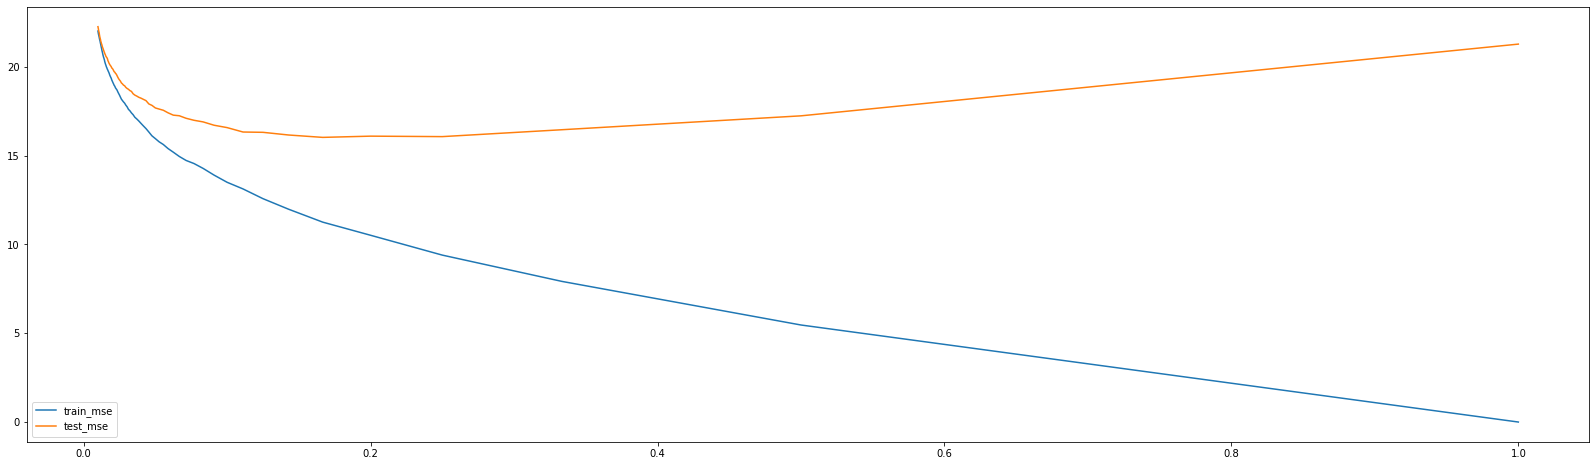

In [81]:
x=[1/i for i in range(100,0,-1)]
plt.figure(figsize=(28,8))
plt.plot(x,train_mse,label='train_mse')
plt.plot(x,test_mse,label='test_mse')
plt.legend()
plt.show()

In [82]:
min(test_mse)

16.019986740972936

In [83]:
def search_k(lst,val):
    for i in range(len(lst)):
        if lst[i]== val:
            return 100-i

In [84]:
search_k(test_mse,min(test_mse))

6

### Using raw features, the best k is 6. The test MSE is 16.02

In [85]:
# KNN for normalized features
train_mse=[]
test_mse=[]
for k in range(100,0,-1):
    neigh = KNeighborsRegressor(n_neighbors=k,p=2,metric = 'euclidean')
    x_train = X_norm_train.values.tolist()
    y_train = y_norm_train.values.flatten().tolist() 
    neigh.fit(x_train, y_train)
    y_pred_train = neigh.predict(x_train)
    train_mse.append(mean_squared_error(y_train, y_pred_train))
    x_test = X_norm_test.values.tolist()
    y_test = y_norm_test.values.flatten().tolist()
    y_pred_test = neigh.predict(x_test)
    test_mse.append(mean_squared_error(y_test, y_pred_test))

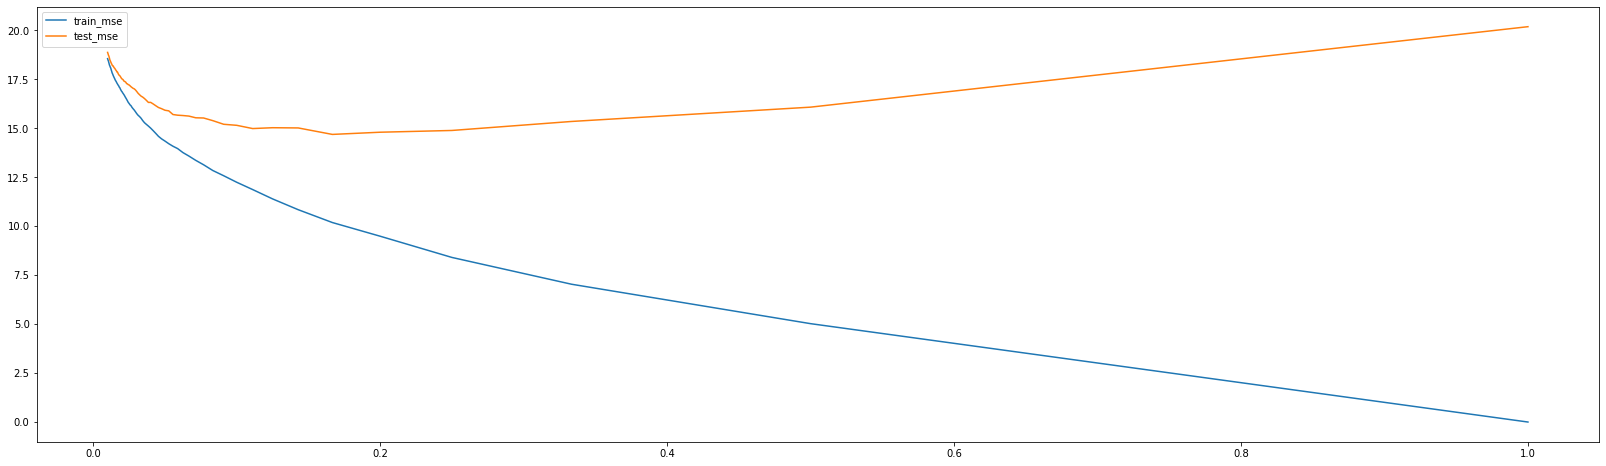

In [86]:
x=[1/i for i in range(100,0,-1)]
plt.figure(figsize=(28,8))
plt.plot(x,train_mse,label='train_mse')
plt.plot(x,test_mse,label='test_mse')
plt.legend()
plt.show()

In [87]:
min(test_mse)

14.68705553814001

In [88]:
search_k(test_mse,min(test_mse))

6

### Using normalized features, the best k is 6. The best test MSE is 14.68

## j

### The baseline linear regression model has smallest test MSE of 21.04. It is still bigger than test MSE of KNN regression model with normalized features. As we can see from the pairwised scatter plots, most plots have circle-like centralized pattern but a linear-related pattern. Therefore, using Neighbourhood points to predict the 'PE' is a better way. Last but not least, this dataset only has 4 predictors. It will not cause curse of dimensionality by using KNN regression. But if it has more predictors, linear regression model will beat KNN.

## 2.4.1

### (a) Better. A flexible method will fit the data better and when the sample size is large, would perform better than an inflexible approach.

### (b) Worse. A flexible method can result into overfitting when number of observations is limited.

### (c) Better. With it comes to non-linear situation, a flexible method would fit better than an inflexible one.

### (d) Worse. A flexible method would learn from the noise in the error terms and increase variance.

## 2.4.7

### (a) obs1: sqrt(0+3^2+0) = 3  <br /> obs2:sqrt(2^2+0+0) = 2 <br /> obs3: sqrt(0+1+9) = 3.16 <br />  obs4: sqrt(0+1+4)=2.24  <br /> obs5: sqrt(1+0+1）= 1.41  <br />  obs6: sqrt(1+1+1) = 1.73

### (b) K =1 Only use obs5 to predict. Therefore, prediction is green.

### (c) K=3 Use obs5, obs6, obs2 to predict. Therefore, prediction is red.

### (d) The larger K becomes , more inflexible(linear) the boundary becomes. So we expect the best value for K to be small